<a href="https://colab.research.google.com/github/MiladRamezani0/IACV-Syn-of-Proj-Transform/blob/main/Syn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2  # For image processing
import numpy as np  # For matrix operations
import matplotlib.pyplot as plt  # For visualization
from google.colab import files
from PIL import Image
import io
import numpy as np


Saving IM1.jpg to IM1.jpg
Saving IM2.jpg to IM2.jpg


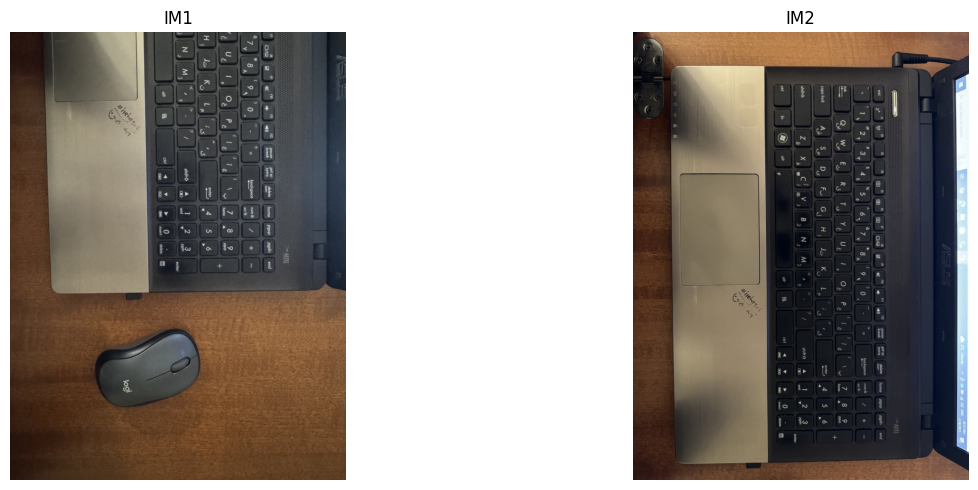

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import io

uploaded = files.upload()

# Set up a figure to display multiple images
num_images = len(uploaded.keys())
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Loop through uploaded files and display each image
for i, (fn, content) in enumerate(uploaded.items()):
    image = Image.open(io.BytesIO(content))

    if num_images == 1:  # In case only one image is uploaded
        ax = axes
    else:
        ax = axes[i]

    ax.imshow(image)
    ax.axis('off')  # Remove axis for cleaner visualization
    ax.set_title(fn.split('.')[0])  # Set the title to the image name (without extension)

plt.tight_layout()
plt.show()


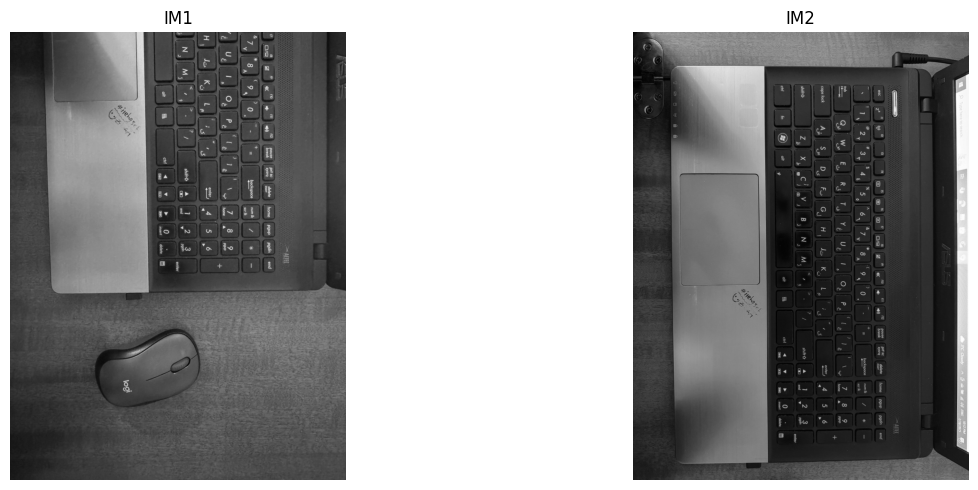

In [ ]:
# Check if 'uploaded' exists and is not empty
if 'uploaded' in locals() and uploaded:
    # Set up a figure to display multiple images
    num_images = len(uploaded.keys())
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through uploaded files and display each grayscale image
    for i, (fn, content) in enumerate(uploaded.items()):
        try:
            image = Image.open(io.BytesIO(content)).convert("L")  # Convert to grayscale

            if num_images == 1:  # Handle single image case
                ax = axes
            else:
                ax = axes[i]

            ax.imshow(image, cmap='gray')  # Display grayscale image
            ax.axis('off')
            ax.set_title(fn.split('.')[0])

        except Exception as e:
            print(f"Error displaying {fn}: {e}")

    plt.tight_layout()
    plt.show()
else:
    print("No images uploaded or 'uploaded' variable not found.")

Which method would you like to use for keypoint detection? (SIFT/ORB): sift


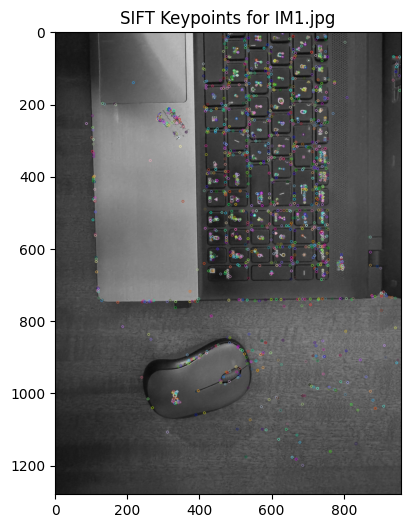

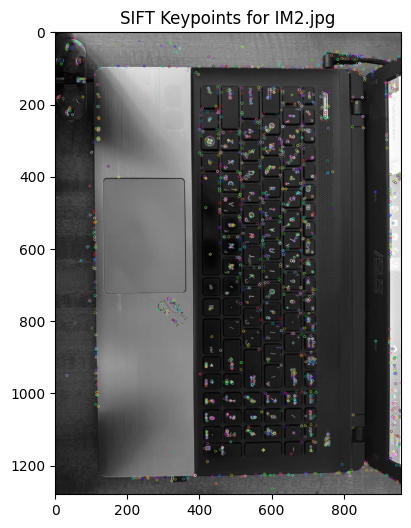

In [ ]:

method = input("Which method would you like to use for keypoint detection? (SIFT/ORB): ").strip().upper()

# Check if 'uploaded' exists and is not empty
if 'uploaded' in locals() and uploaded:
    # Loop through uploaded files and perform the chosen method
    for fn, content in uploaded.items():
        try:
            # Read the image using OpenCV
            nparr = np.frombuffer(content, np.uint8)
            img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

            if method == 'SIFT':
                # Create SIFT object
                sift = cv2.SIFT_create()

                # Detect keypoints and compute descriptors
                keypoints, descriptors = sift.detectAndCompute(img, None)

                # Draw keypoints on the image
                img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

                # Display the image with keypoints
                plt.figure(figsize=(8, 6))
                plt.imshow(img_with_keypoints, cmap='gray')
                plt.title(f"SIFT Keypoints for {fn}")
                plt.show()

            elif method == 'ORB':
                # Create ORB object
                orb = cv2.ORB_create()

                # Detect keypoints and compute descriptors
                keypoints, descriptors = orb.detectAndCompute(img, None)

                # Draw keypoints on the image
                img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

                # Display the image with keypoints
                plt.figure(figsize=(8, 6))
                plt.imshow(img_with_keypoints, cmap='gray')
                plt.title(f"ORB Keypoints for {fn}")
                plt.show()

            else:
                print("Invalid method chosen. Please choose either 'SIFT' or 'ORB'.")

        except Exception as e:
            print(f"Error processing {fn}: {e}")
else:
    print("No images uploaded or 'uploaded' variable not found.")


Which matcher would you like to use? (FLANN/BFMatcher): flann


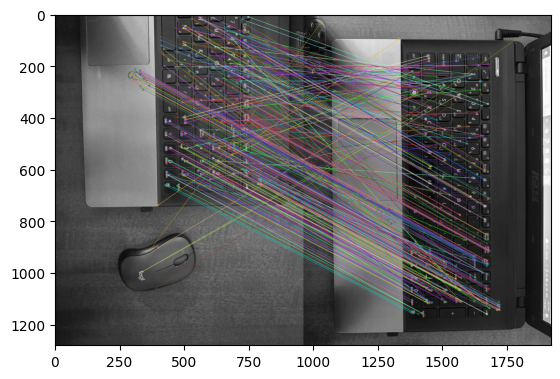

In [ ]:

matcher_choice = input("Which matcher would you like to use? (FLANN/BFMatcher): ").strip().upper()

# Check if 'uploaded' exists and is not empty
if 'uploaded' in locals() and uploaded:
    # Assuming you have two images uploaded (modify as needed)
    image_files = list(uploaded.keys())
    if len(image_files) >= 2:
        try:
            # Read the images using OpenCV
            nparr1 = np.frombuffer(uploaded[image_files[0]], np.uint8)
            img1 = cv2.imdecode(nparr1, cv2.IMREAD_GRAYSCALE)
            nparr2 = np.frombuffer(uploaded[image_files[1]], np.uint8)
            img2 = cv2.imdecode(nparr2, cv2.IMREAD_GRAYSCALE)

            # Create SIFT objects
            sift = cv2.SIFT_create()

            # Find the keypoints and descriptors with SIFT
            kp1, des1 = sift.detectAndCompute(img1, None)
            kp2, des2 = sift.detectAndCompute(img2, None)

            if matcher_choice == 'BFMATCHER':
                # Use BFMatcher
                bf = cv2.BFMatcher()
                matches = bf.knnMatch(des1, des2, k=2)

                # Apply ratio test
                good = []
                for m, n in matches:
                    if m.distance < 0.75 * n.distance:
                        good.append([m])

                # Draw matches
                img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                plt.imshow(img3), plt.show()

            elif matcher_choice == 'FLANN':
                # Use FLANN based matcher
                index_params = dict(algorithm=1, trees=10)
                search_params = dict(checks=50)
                flann = cv2.FlannBasedMatcher(index_params, search_params)
                matches = flann.knnMatch(des1, des2, k=2)

                # Apply ratio test
                good = []
                for m, n in matches:
                    if m.distance < 0.75 * n.distance:
                        good.append([m])

                # Draw matches
                img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                plt.imshow(img3), plt.show()

            else:
                print("Invalid matcher choice. Please choose 'FLANN' or 'BFMatcher'.")

        except Exception as e:
            print(f"Error matching keypoints: {e}")
    else:
        print("Please upload at least two images for keypoint matching.")
else:
    print("No images uploaded or 'uploaded' variable not found.")


In [ ]:
# prompt: Estimate the Homography Matrix 3*3

import cv2
import numpy as np

# Assuming 'good' matches are already calculated (from the previous code)
# and img1, img2, kp1, kp2 are defined

if 'good' in locals() and 'kp1' in locals() and 'kp2' in locals():
    try:
        src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

        # Estimate the homography matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        print("Estimated Homography Matrix:")
        print(M)

    except Exception as e:
        print(f"Error estimating homography: {e}")
else:
    print("Necessary variables ('good', 'kp1', 'kp2') not found. Please run the keypoint matching part first.")

Estimated Homography Matrix:
[[ 9.28948672e-01 -2.57098347e-02  2.74827782e+01]
 [ 1.66733399e-02  8.77981803e-01  5.43871081e+02]
 [ 1.72655232e-05 -4.13820875e-05  1.00000000e+00]]


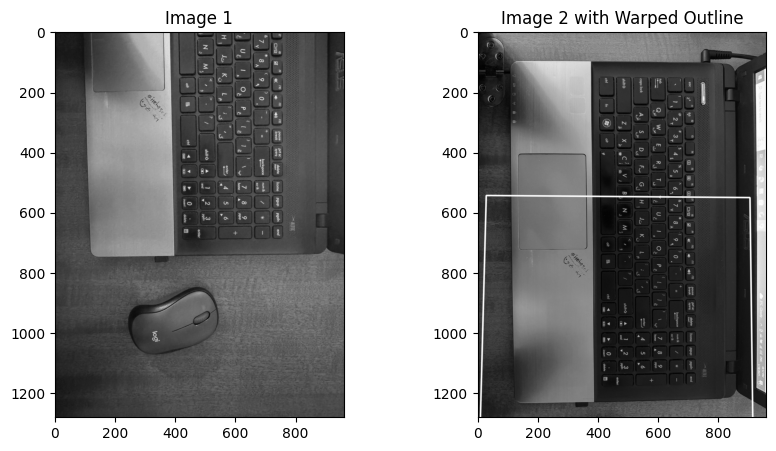

In [ ]:

if 'M' in locals() and 'img1' in locals() and 'img2' in locals():
    try:
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

        plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization
        plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.title('Image 1')
        plt.subplot(122), plt.imshow(img2, cmap='gray'), plt.title('Image 2 with Warped Outline')
        plt.show()


    except Exception as e:
        print(f"Error warping image: {e}")
else:
    print("Necessary variables ('M', 'img1', 'img2') not found. Please run the homography estimation part first.")

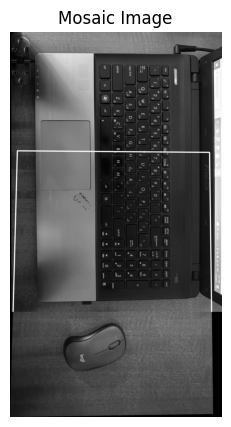

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_mosaic(img1, img2, H):
    """
    Creates a mosaic by warping img2 to img1's perspective using the homography matrix.

    Args:
        img1: The first image.
        img2: The second image.
        H: Homography matrix.

    Returns:
        mosaic: The resulting mosaic image.
    """
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Corners of the second image
    corners_img2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    # Transform corners to the perspective of the first image
    transformed_corners = cv2.perspectiveTransform(corners_img2, H)

    # Determine the size of the resulting mosaic
    all_corners = np.concatenate((np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2), transformed_corners), axis=0)
    [xmin, ymin] = np.int32(all_corners.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(all_corners.max(axis=0).ravel() + 0.5)

    translation_dist = [-xmin, -ymin]
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    # Warp the second image
    mosaic = cv2.warpPerspective(img1, H_translation.dot(H), (xmax - xmin, ymax - ymin))
    # Place the first image in the mosaic
    mosaic[translation_dist[1]:h1 + translation_dist[1], translation_dist[0]:w1 + translation_dist[0]] = img2

    return mosaic

# Assuming M (homography matrix), img1, and img2 are defined
if 'M' in locals() and 'img1' in locals() and 'img2' in locals():
    try:
        # Create the mosaic using the defined function
        mosaic = create_mosaic(img1, img2, M)

        # Show the mosaic image
        plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization
        plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))
        plt.title('Mosaic Image')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error creating mosaic: {e}")
else:
    print("Necessary variables ('M', 'img1', 'img2') not found. Please run the homography estimation part first.")


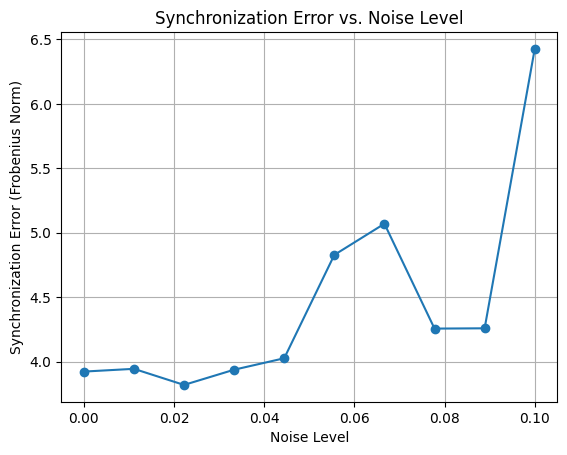

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_homographies(num_nodes):
    """Generates random 3x3 homography matrices."""
    homographies = []
    for _ in range(num_nodes):
        H = np.random.rand(3, 3)
        H[-1, -1] = 1  # Ensure last element is 1 for projective properties
        homographies.append(H)
    return homographies

def compute_relative_homographies(global_homographies):
    """Computes relative homographies from global homographies."""
    num_nodes = len(global_homographies)
    relative_homographies = {}
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                H_ij = global_homographies[j] @ np.linalg.inv(global_homographies[i])
                relative_homographies[(i, j)] = H_ij
    return relative_homographies

def add_noise_to_homographies(relative_homographies, noise_level=0.01):
    """Adds noise to relative homographies."""
    noisy_homographies = {}
    for key, H in relative_homographies.items():
        noise = np.random.normal(scale=noise_level, size=H.shape)
        noisy_homographies[key] = H + noise
    return noisy_homographies

def synchronize_homographies(relative_homographies, num_nodes):
    """Synchronizes global homographies from relative homographies."""
    # Initialize global homographies (identity for node 0)
    global_homographies = [np.eye(3)]
    for i in range(1, num_nodes):
        H_i = global_homographies[0]
        for j in range(i):
            H_i = H_i @ np.linalg.inv(relative_homographies[(0, j + 1)])
        global_homographies.append(H_i)
    return global_homographies

def compute_error(true_homographies, retrieved_homographies):
    """Computes the average Frobenius norm error."""
    errors = [np.linalg.norm(H_true - H_retrieved, 'fro')
              for H_true, H_retrieved in zip(true_homographies, retrieved_homographies)]
    return np.mean(errors)

# Parameters
num_nodes = 5
noise_levels = np.linspace(0, 0.1, 10)  # Different noise levels for the experiment
errors = []

# Ground-truth homographies
true_global_homographies = generate_random_homographies(num_nodes)
relative_homographies = compute_relative_homographies(true_global_homographies)

# Experiment with different noise levels
for noise_level in noise_levels:
    noisy_relative_homographies = add_noise_to_homographies(relative_homographies, noise_level)
    retrieved_global_homographies = synchronize_homographies(noisy_relative_homographies, num_nodes)
    error = compute_error(true_global_homographies, retrieved_global_homographies)
    errors.append(error)

# Plot the results
plt.plot(noise_levels, errors, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Synchronization Error (Frobenius Norm)')
plt.title('Synchronization Error vs. Noise Level')
plt.grid()
plt.show()



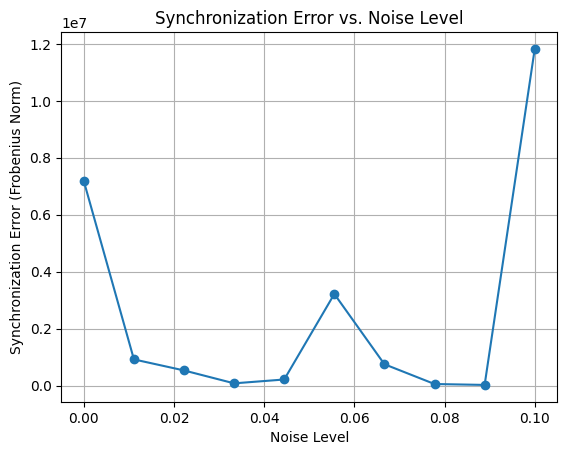

In [ ]:
# prompt: Concerning synthetic experiments, the idea is to work with matrices only (no images). You can simulate random 3x3 matrices (associated with nodes in the graph, representing the global  homographies in the mosaic), and compute relative homographies from them - this represents a possible dataset. Then, in order to test the method, you can compare the real global homographies with the ones retrieved by your implementation. Ideally, the error should be zero in a noiseless case, and should increase if you introduce noise in the input relative homographies. This could be represented in a plot. Have you done experiments of this type?

import numpy as np
import matplotlib.pyplot as plt

def generate_random_homographies(num_nodes):
    """Generates random 3x3 homography matrices."""
    homographies = []
    for _ in range(num_nodes):
        H = np.random.rand(3, 3)
        H[-1, -1] = 1  # Ensure last element is 1 for projective properties
        homographies.append(H)
    return homographies

def compute_relative_homographies(global_homographies):
    """Computes relative homographies from global homographies."""
    num_nodes = len(global_homographies)
    relative_homographies = {}
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                H_ij = global_homographies[j] @ np.linalg.inv(global_homographies[i])
                relative_homographies[(i, j)] = H_ij
    return relative_homographies

def add_noise_to_homographies(relative_homographies, noise_level=0.01):
    """Adds noise to relative homographies."""
    noisy_homographies = {}
    for key, H in relative_homographies.items():
        noise = np.random.normal(scale=noise_level, size=H.shape)
        noisy_homographies[key] = H + noise
    return noisy_homographies

def synchronize_homographies(relative_homographies, num_nodes):
    """Synchronizes global homographies from relative homographies."""
    # Initialize global homographies (identity for node 0)
    global_homographies = [np.eye(3)]
    for i in range(1, num_nodes):
        H_i = global_homographies[0]
        for j in range(i):
            H_i = H_i @ np.linalg.inv(relative_homographies[(0, j + 1)])
        global_homographies.append(H_i)
    return global_homographies

def compute_error(true_homographies, retrieved_homographies):
    """Computes the average Frobenius norm error."""
    errors = [np.linalg.norm(H_true - H_retrieved, 'fro')
              for H_true, H_retrieved in zip(true_homographies, retrieved_homographies)]
    return np.mean(errors)

# Parameters
num_nodes = 15
noise_levels = np.linspace(0, 0.1, 10)  # Different noise levels for the experiment
errors = []

# Ground-truth homographies
true_global_homographies = generate_random_homographies(num_nodes)
relative_homographies = compute_relative_homographies(true_global_homographies)

# Experiment with different noise levels
for noise_level in noise_levels:
    noisy_relative_homographies = add_noise_to_homographies(relative_homographies, noise_level)
    retrieved_global_homographies = synchronize_homographies(noisy_relative_homographies, num_nodes)
    error = compute_error(true_global_homographies, retrieved_global_homographies)
    errors.append(error)

# Plot the results
plt.plot(noise_levels, errors, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Synchronization Error (Frobenius Norm)')
plt.title('Synchronization Error vs. Noise Level')
plt.grid()
plt.show()

In [ ]:
import numpy as np

def generate_random_homographies(num_nodes):
    """Generates random 3x3 homography matrices with unit determinant."""
    homographies = []
    for _ in range(num_nodes):
        H = np.random.rand(3, 3)
        det_H = np.linalg.det(H)

        # Normalize determinant to 1 using absolute value for fractional power
        if det_H != 0:
            H /= np.abs(det_H)**(1/3)  # Normalize determinant to 1

            # Adjust sign to match the original determinant
            if det_H < 0:
                H = -H
        else:
            # If determinant is zero, regenerate the homography matrix
            H = np.random.rand(3, 3)
            H /= np.linalg.det(H)**(1/3)

        homographies.append(H)
    return homographies

# Number of nodes in the graph
num_nodes = 5

# Generate ground-truth global homographies
true_global_homographies = generate_random_homographies(num_nodes)
print("True Global Homographies:")
for i, H in enumerate(true_global_homographies):
    print(f"Node {i}:\n{H}\n")


True Global Homographies:
Node 0:
[[0.99543086 4.27849271 2.21012537]
 [4.17164602 5.33773016 1.33853232]
 [0.11945057 2.52480521 1.45106937]]

Node 1:
[[0.71626064 1.97850645 2.00428858]
 [1.66163282 1.90478477 2.67969013]
 [0.98097983 2.97384465 2.41885835]]

Node 2:
[[1.36912361 0.71304767 0.45032907]
 [1.09488478 0.14993377 1.81518993]
 [1.32893328 0.21710956 0.3437702 ]]

Node 3:
[[-0.24097286 -2.61824934 -0.0664187 ]
 [-2.78947428 -3.27281819 -2.08541876]
 [-0.50890672 -1.58481289 -0.48585544]]

Node 4:
[[-1.36243487 -1.65916306 -0.04384897]
 [-0.87789054 -0.19598534 -0.69638654]
 [-0.34602057 -1.4237264  -0.08475991]]



In [ ]:
def compute_relative_homographies(global_homographies):
    """Computes relative homographies from global homographies."""
    num_nodes = len(global_homographies)
    relative_homographies = {}
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                H_ij = global_homographies[j] @ np.linalg.inv(global_homographies[i])
                relative_homographies[(i, j)] = H_ij
    return relative_homographies

# Compute relative homographies
relative_homographies = compute_relative_homographies(true_global_homographies)
print("Relative Homographies:")
for key, H in relative_homographies.items():
    print(f"Edge {key}:\n{H}\n")

Relative Homographies:
Edge (0, 1):
[[ 11.29929605  -2.12747605 -13.86624051]
 [ 22.54425388  -4.16072289 -28.65243815]
 [ 10.69121132  -1.94890318 -12.81909022]]

Edge (0, 2):
[[  6.23112217  -0.92009716  -8.3315468 ]
 [ 21.85781262  -4.14525218 -28.21695724]
 [  7.92404704  -1.26691963 -10.66355247]]

Edge (0, 3):
[[ 13.72127356  -2.80630665 -18.35599453]
 [-13.52551443   2.06456361  17.2591189 ]
 [  2.31066394  -0.57827156  -3.32077665]]

Edge (0, 4):
[[ 3.39609267 -1.01479079 -4.26672179]
 [-9.56847992  1.71449486 12.51232183]
 [ 6.04128891 -1.2935264  -8.06669839]]

Edge (1, 0):
[[ -2.50414565  -0.24834718   3.26379152]
 [-17.33244644   3.40021199  11.14833462]
 [  0.54659961  -0.724062     0.9491204 ]]

Edge (1, 2):
[[-4.21012291  1.35654944  2.17189163]
 [ 1.68883731  0.90776427 -1.65460469]
 [-3.71284484  1.4453631   1.61739835]]

Edge (1, 3):
[[ 4.24671281  0.34120105 -3.92431817]
 [ 7.51974755 -2.11769489 -4.74703151]
 [ 2.42148653 -0.13564457 -2.05705631]]

Edge (1, 4):
[[ 6

In [ ]:
def add_noise_to_homographies(relative_homographies, noise_level=0.01):
    """Adds noise to relative homographies."""
    noisy_homographies = {}
    for key, H in relative_homographies.items():
        noise = np.random.normal(scale=noise_level, size=H.shape)
        noisy_homographies[key] = H + noise
    return noisy_homographies

# Set noise level
noise_level = 0.05

# Add noise to relative homographies
noisy_relative_homographies = add_noise_to_homographies(relative_homographies, noise_level)
print("Noisy Relative Homographies:")
for key, H in noisy_relative_homographies.items():
    print(f"Edge {key}:\n{H}\n")


Noisy Relative Homographies:
Edge (0, 1):
[[ 11.25763053  -2.06418547 -13.83631202]
 [ 22.5730706   -4.1093703  -28.62223845]
 [ 10.61795138  -1.93879888 -12.76767022]]

Edge (0, 2):
[[  6.20543018  -0.9520052   -8.3015755 ]
 [ 21.79686214  -4.14220756 -28.19228764]
 [  7.92320899  -1.20543232 -10.69874338]]

Edge (0, 3):
[[ 13.644366    -2.80848978 -18.3557326 ]
 [-13.44287697   2.13805801  17.31723637]
 [  2.24999191  -0.56130015  -3.40256461]]

Edge (0, 4):
[[ 3.36211154 -1.01082091 -4.31917958]
 [-9.52560889  1.77407649 12.56551749]
 [ 6.0879718  -1.25940412 -8.15879703]]

Edge (1, 0):
[[ -2.43406067  -0.27291629   3.23690191]
 [-17.25749339   3.47776102  11.20283346]
 [  0.58561118  -0.73941922   1.02178703]]

Edge (1, 2):
[[-4.21605103  1.39069233  2.16493094]
 [ 1.71275384  0.95799362 -1.69109677]
 [-3.67825131  1.49596784  1.68413066]]

Edge (1, 3):
[[ 4.18550469  0.36300526 -3.99574716]
 [ 7.52985196 -2.13949869 -4.74189984]
 [ 2.38446963 -0.11993165 -2.11413248]]

Edge (1, 4)

In [ ]:
def direct_synchronization(relative_homographies, num_nodes):
    """Direct synchronization to retrieve global homographies."""
    global_homographies = [np.eye(3)]  # Initialize first node with identity
    for i in range(1, num_nodes):
        H_i = global_homographies[0]
        for j in range(i):
            H_i = H_i @ np.linalg.inv(relative_homographies[(0, j + 1)])
        global_homographies.append(H_i)
    return global_homographies

# Retrieve global homographies using direct method
retrieved_global_homographies_direct = direct_synchronization(noisy_relative_homographies, num_nodes)
print("Retrieved Global Homographies (Direct Method):")
for i, H in enumerate(retrieved_global_homographies_direct):
    print(f"Node {i}:\n{H}\n")


Retrieved Global Homographies (Direct Method):
Node 0:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Node 1:
[[-17.3701027    2.70388566  12.76246157]
 [-90.15508147  18.25359789  56.78052401]
 [ -0.75521489  -0.52322222   1.91304909]]

Node 2:
[[-1.61196896e+02  1.47040570e+00  1.20011444e+02]
 [-8.84168395e+02  2.97865233e+00  6.72904741e+02]
 [-9.83933467e-01  7.81927188e-01 -1.47579643e+00]]

Node 3:
[[ -34.57541127   14.93943238  227.28598263]
 [-155.71542057  102.74699618 1165.19753476]
 [  -5.34700115   -3.0602433    13.70406399]]

Node 4:
[[  340.6389387   -586.33531149 -1111.21447296]
 [ 1741.70743031 -3154.33094974 -5922.9007952 ]
 [   21.23317285   -12.8708222    -32.74287753]]



In [ ]:
def iterative_synchronization(noisy_homographies, num_nodes, max_iterations=100, tolerance=1e-6):
    """Iterative synchronization using averaging."""
    global_homographies = [np.eye(3) for _ in range(num_nodes)]  # Initialize with identity
    for iteration in range(max_iterations):
        max_change = 0
        for (i, j), Z_ij in noisy_homographies.items():
            H_i_new = Z_ij @ global_homographies[j]
            H_i_avg = (H_i_new + global_homographies[i]) / 2
            change = np.linalg.norm(global_homographies[i] - H_i_avg)
            max_change = max(max_change, change)
            global_homographies[i] = H_i_avg

        if max_change < tolerance:
            print(f"Iterative method converged after {iteration + 1} iterations.")
            break
    return global_homographies

# Retrieve global homographies using iterative method
retrieved_global_homographies_iterative = iterative_synchronization(noisy_relative_homographies, num_nodes)
print("Retrieved Global Homographies (Iterative Method):")
for i, H in enumerate(retrieved_global_homographies_iterative):
    print(f"Node {i}:\n{H}\n")


Retrieved Global Homographies (Iterative Method):
Node 0:
[[ 2.81594166e+23 -2.28771767e+22 -4.56043252e+23]
 [-1.28993146e+23 -2.91987578e+22  2.55840577e+23]
 [ 1.66789888e+22  3.39691595e+21 -3.26327793e+22]]

Node 1:
[[-1.02798825e+23  1.56093241e+22  1.57898032e+23]
 [-2.85699897e+23  2.60244537e+22  4.59364160e+23]
 [-7.07210434e+20  1.49623336e+22 -1.64856271e+22]]

Node 2:
[[ 2.53630618e+22 -1.93185800e+22 -2.06611013e+22]
 [ 1.22136377e+22 -2.64719854e+22  1.03598813e+22]
 [-3.74527795e+22 -1.77234062e+22  8.52192018e+22]]

Node 3:
[[-1.13434624e+23  2.17229055e+22  1.68913126e+23]
 [-3.55802780e+22  2.28346139e+22  3.40307072e+22]
 [-1.44312397e+23 -1.56921634e+22  2.66145444e+23]]

Node 4:
[[-3.22187163e+22 -2.78416871e+22  8.82085107e+22]
 [-1.02683898e+23  1.86931846e+22  1.54052968e+23]
 [ 1.82008050e+22 -2.01245607e+22 -7.42009748e+21]]



In [ ]:
def compute_error(true_homographies, retrieved_homographies):
    """Computes the average Frobenius norm error."""
    errors = [np.linalg.norm(H_true - H_retrieved, 'fro')
              for H_true, H_retrieved in zip(true_homographies, retrieved_homographies)]
    return errors

# Compute errors for both methods
errors_direct = compute_error(true_global_homographies, retrieved_global_homographies_direct)
errors_iterative = compute_error(true_global_homographies, retrieved_global_homographies_iterative)

print(f"Direct Method Errors: {errors_direct}")
print(f"Iterative Method Errors: {errors_iterative}")


Direct Method Errors: [8.23363531706224, 109.92439961734716, 1129.067042133785, 1204.3999409501794, 7053.570058906727]
Iterative Method Errors: [6.09995830741526e+23, 5.740699606919274e+23, 1.0667606020729386e+23, 3.69759539365464e+23, 2.121579756721584e+23]


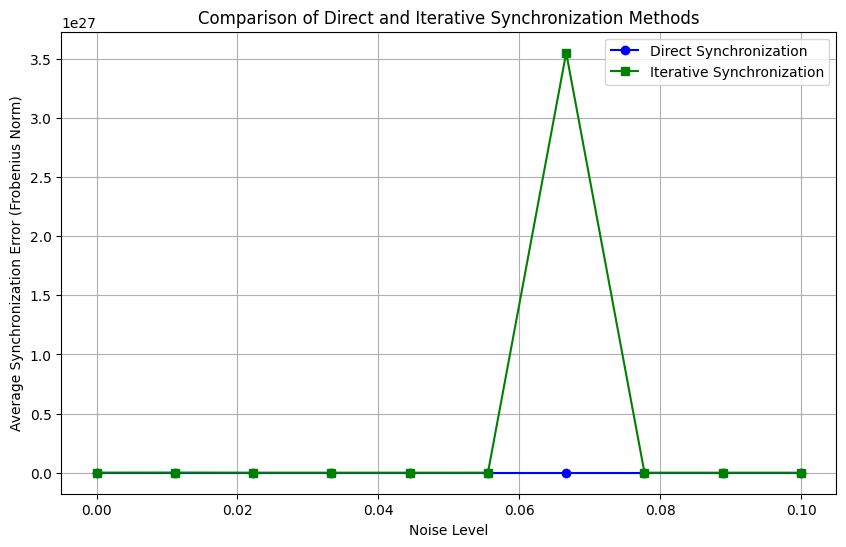

In [ ]:
import matplotlib.pyplot as plt

# Noise levels for experiments
noise_levels = np.linspace(0, 0.1, 10)
errors_direct_avg = []
errors_iterative_avg = []

# Experiment with different noise levels
for noise_level in noise_levels:
    noisy_homographies = add_noise_to_homographies(relative_homographies, noise_level)
    retrieved_direct = direct_synchronization(noisy_homographies, num_nodes)
    retrieved_iterative = iterative_synchronization(noisy_homographies, num_nodes)
    errors_direct_avg.append(np.mean(compute_error(true_global_homographies, retrieved_direct)))
    errors_iterative_avg.append(np.mean(compute_error(true_global_homographies, retrieved_iterative)))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, errors_direct_avg, label='Direct Synchronization', marker='o', color='blue')
plt.plot(noise_levels, errors_iterative_avg, label='Iterative Synchronization', marker='s', color='green')
plt.xlabel('Noise Level')
plt.ylabel('Average Synchronization Error (Frobenius Norm)')
plt.title('Comparison of Direct and Iterative Synchronization Methods')
plt.legend()
plt.grid()
plt.show()



In [ ]:
import numpy as np

def update_projectivity(X, neighbors, Z):
    """Update the projectivity Xi by averaging estimates from neighbors."""
    estimates = []
    for j in neighbors:
        Xi_j = Z[(X, j)] @ X[j]  # Estimate Xi|j = Zij * Xj
        estimates.append(Xi_j)

    # Average the estimates to get the new value for Xi
    X_new = np.mean(estimates, axis=0)
    return X_new

def update_projectivity(X, neighbors, Z, i):  # Added 'i' as an argument
    """Update the projectivity Xi by averaging estimates from neighbors."""
    estimates = []
    for j in neighbors:
        # Use (i, j) as the key for Z dictionary
        Xi_j = Z.get((i, j), np.eye(3)) @ X[j]  # Estimate Xi|j = Zij * Xj, default to identity if key not found
        estimates.append(Xi_j)

    # Average the estimates to get the new value for Xi
    X_new = np.mean(estimates, axis=0)
    return X_new

def iterative_synchronization_with_update(X, Z, num_nodes, max_iterations=100, tolerance=1e-6):
    """Iterative synchronization with projectivity updates for each node."""
    for iteration in range(max_iterations):
        max_change = 0
        for i in range(num_nodes):
            neighbors = [j for j in range(num_nodes) if i != j]
            X_new = update_projectivity(X, neighbors, Z, i)  # Pass 'i' to update_projectivity
            change = np.linalg.norm(X[i] - X_new)
            max_change = max(max_change, change)
            X[i] = X_new

        # Check for convergence
        if max_change < tolerance:
            print(f"Iterative method converged after {iteration + 1} iterations.")
            break
    return X

# Example usage
num_nodes = 5
X = [np.random.rand(3) for _ in range(num_nodes)]  # Initial estimates for each node
Z = {(i, j): np.random.rand(3, 3) for i in range(num_nodes) for j in range(num_nodes) if i != j}  # Example Zij matrices

# Perform iterative synchronization
final_projectivities = iterative_synchronization_with_update(X, Z, num_nodes)

print("Final Projectivity Estimates:")
for i, Xi in enumerate(final_projectivities):
    print(f"Node {i}: {Xi}")


Final Projectivity Estimates:
Node 0: [9.88250029e+33 1.02100678e+34 1.08635603e+34]
Node 1: [9.12024031e+33 1.28570672e+34 1.06385466e+34]
Node 2: [1.23143489e+34 1.50662260e+34 1.50381985e+34]
Node 3: [1.38053878e+34 1.85528671e+34 1.23090594e+34]
Node 4: [2.38971371e+34 2.16503360e+34 1.99205517e+34]


In [ ]:
import numpy as np

def direction_based_averaging(h_vectors):
    """Compute the centroid of the projective transformations using direction-based averaging."""
    I16 = np.eye(16)  # 16x16 Identity matrix
    p = len(h_vectors)  # Number of projective transformations

    # Create the matrix from the equation (7)
    matrix = np.zeros((16, 16))
    for h in h_vectors:
        h_vec = h / np.linalg.norm(h)  # Normalize the vector to handle scale ambiguity
        matrix += (I16 - np.outer(h_vec, h_vec))  # hkh⊤ / ||hk||^2

    # Compute the eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eig(matrix)

    # Find the eigenvector corresponding to the minimum eigenvalue
    min_eigvec = eigvecs[:, np.argmin(eigvals)]

    # The centroid is the eigenvector corresponding to the minimum eigenvalue
    return min_eigvec

# Example usage
# h_vectors are the 16-dimensional vectors (vectorized 4x4 projective transformations)
h_vectors = [np.random.rand(16) for _ in range(5)]  # Random example vectors

centroid = direction_based_averaging(h_vectors)

print("Centroid vector:", centroid)


Centroid vector: [-0.26140473 -0.22850995 -0.29228392 -0.2004261  -0.29703735 -0.24059623
 -0.10960298 -0.28871409 -0.19235098 -0.33103836 -0.2362466  -0.29478072
 -0.26159475 -0.21797842 -0.28632993 -0.15855354]


In [ ]:
import numpy as np

def spherical_averaging(h_vectors, max_iter=100, tol=1e-6):
    """Compute the geodesic L1 mean of projective transformations on the unit sphere."""
    # Normalize each vector to have unit length
    normalized_hk = [h / np.linalg.norm(h) for h in h_vectors]

    # Initialize centroid as the first normalized vector
    c = normalized_hk[0]

    for _ in range(max_iter):
        # Calculate the numerator of the fixed-point equation (10)
        numerator = np.zeros_like(c)
        for hk in normalized_hk:
            dot_product = np.dot(c, hk)
            # Avoid division by zero in the denominator
            denominator = 1 - dot_product ** 2
            if denominator > tol:
                numerator += hk / denominator

        # Normalize the result to ensure it's on the unit sphere
        c_new = numerator / np.linalg.norm(numerator)

        # Check for convergence
        if np.linalg.norm(c_new - c) < tol:
            break

        c = c_new

    return c

# Example usage
# h_vectors are the 16-dimensional vectors (vectorized 4x4 projective transformations)
h_vectors = [np.random.rand(16) for _ in range(5)]  # Random example vectors

centroid_spherical = spherical_averaging(h_vectors)

print("Centroid vector (spherical averaging):", centroid_spherical)



Centroid vector (spherical averaging): [0.23761684 0.18102582 0.15826295 0.23627516 0.19318229 0.2807593
 0.18061921 0.1973525  0.29611197 0.20030146 0.25131035 0.25300703
 0.2282818  0.22798597 0.28623549 0.44853644]


In [ ]:
import numpy as np

def euclidean_averaging(h_vectors, max_iter=100, tol=1e-6):
    """Compute the Euclidean L1 mean of projective transformations in Euclidean space."""
    # Normalize each vector to have unit length
    normalized_hk = [h / np.linalg.norm(h) for h in h_vectors]

    # Initialize centroid as the mean of the vectors
    c = np.mean(normalized_hk, axis=0)

    for _ in range(max_iter):
        # Compute the Weiszfeld update for each point
        numerator = np.zeros_like(c)
        denominator = 0

        for hk in normalized_hk:
            dist = np.linalg.norm(c - hk)
            if dist > tol:  # Avoid division by zero
                numerator += hk / dist
                denominator += 1 / dist

        # Update the centroid
        c_new = numerator / denominator

        # Normalize to ensure the result is on the unit sphere
        c_new = c_new / np.linalg.norm(c_new)

        # Check for convergence
        if np.linalg.norm(c_new - c) < tol:
            break

        c = c_new

    return c

# Example usage
# h_vectors are the 16-dimensional vectors (vectorized 4x4 projective transformations)
h_vectors = [np.random.rand(16) for _ in range(5)]  # Random example vectors

centroid_euclidean = euclidean_averaging(h_vectors)

print("Centroid vector (Euclidean averaging):", centroid_euclidean)


Centroid vector (Euclidean averaging): [0.1082608  0.28851888 0.27400262 0.19009791 0.32639955 0.21816072
 0.31119117 0.19269815 0.27635883 0.34137896 0.20886163 0.19474059
 0.22219965 0.24677384 0.20482789 0.28112837]


In [ ]:
import numpy as np

def spectral_method(h_vectors):
    """Compute the synchronized projective transformation using the Spectral method for 3x3 matrices."""
    # Stack the vectors to form a matrix where each row is a vectorized 3x3 projective transformation
    H_matrix = np.vstack(h_vectors)

    # Compute the covariance matrix of the H_matrix
    covariance_matrix = np.cov(H_matrix, rowvar=False)

    # Perform Singular Value Decomposition (SVD) on the covariance matrix
    U, S, Vt = np.linalg.svd(covariance_matrix)

    # The optimal transformation is the first eigenvector of the covariance matrix (U[:, 0])
    optimal_transformation = U[:, 0]

    # Reshape the resulting vector to a 3x3 matrix
    synchronized_matrix = optimal_transformation.reshape(3, 3)

    return synchronized_matrix

# Example usage
# h_vectors are the 9-dimensional vectors (vectorized 3x3 projective transformations)
h_vectors = [np.random.rand(9) for _ in range(5)]  # Random example vectors

synchronized_transformation = spectral_method(h_vectors)

print("Synchronized transformation matrix using Spectral method:")
print(synchronized_transformation)


Synchronized transformation matrix using Spectral method:
[[-0.29655769 -0.57216745 -0.0604268 ]
 [ 0.29884357 -0.02434382 -0.38029946]
 [-0.15908021  0.31611306 -0.47038792]]


In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def tree_method(h_vectors):
    """Compute the synchronized projective transformation using the Tree method (spanning tree)."""
    n = len(h_vectors)  # Number of projective transformations

    # Initializing the adjacency matrix
    adjacency_matrix = np.zeros((n, n))

    # Compute pairwise angular distances between projective transformations
    for i in range(n):
        for j in range(i + 1, n):
            # Compute the angular distance between the two projective transformations (h_vectors[i] and h_vectors[j])
            dist = np.arccos(np.clip(np.dot(h_vectors[i], h_vectors[j]) / (np.linalg.norm(h_vectors[i]) * np.linalg.norm(h_vectors[j])), -1.0, 1.0))
            adjacency_matrix[i, j] = dist
            adjacency_matrix[j, i] = dist

    # Now we perform the spanning tree optimization
    # Start by initializing the first transformation as the root of the tree
    tree_transforms = [h_vectors[0]]  # This is the root transformation

    # Use Prim's algorithm to select the next closest transformation based on the adjacency matrix
    selected = [False] * n
    selected[0] = True  # Mark the first transformation as selected

    for _ in range(1, n):
        min_dist = float('inf')
        min_index = -1
        for i in range(n):
            if not selected[i]:
                dist_to_tree = min([adjacency_matrix[i][j] for j in range(n) if selected[j]])
                if dist_to_tree < min_dist:
                    min_dist = dist_to_tree
                    min_index = i

        # Add the selected transformation to the tree
        tree_transforms.append(h_vectors[min_index])
        selected[min_index] = True

    # Now we have a "tree" of transformations. To synchronize, compute the mean transformation.
    # We will use the centroid of the tree, which is the average of all transformations in the tree.
    centroid = np.mean(tree_transforms, axis=0)

    # Normalize the centroid to have unit length, as we expect the result to be a projective transformation
    centroid_normalized = centroid / np.linalg.norm(centroid)

    # Reshape the result back into a 3x3 projective transformation matrix
    synchronized_matrix = centroid_normalized.reshape(3, 3)

    return synchronized_matrix

# Example usage
# h_vectors are the 9-dimensional vectors (vectorized 3x3 projective transformations)
h_vectors = [np.random.rand(9) for _ in range(5)]  # Random example vectors

synchronized_transformation_tree = tree_method(h_vectors)

print("Synchronized transformation matrix using Tree method:")
print(synchronized_transformation_tree)


Synchronized transformation matrix using Tree method:
[[0.34333188 0.17443388 0.31403542]
 [0.42387721 0.34468934 0.39696857]
 [0.37035999 0.24964888 0.31228196]]


In [ ]:
import numpy as np

def calculate_residual(Zij, Xi, Xj):
    """Compute the residual between the obtained node transformations."""
    # Reshape Zij into a 4x4 matrix (assuming Zij is a vectorized 4x4 matrix)
    Zij_matrix = Zij.reshape(4, 4)

    # Compute the transformation error (angular distance between vectorized matrices)
    diff = Zij_matrix - (Xi @ np.linalg.inv(Xj))  # Matrix multiplication
    residual = np.linalg.norm(diff)  # You can replace this with angular distance if needed
    return residual

def irls_synchronization(h_vectors, max_iter=100, tol=1e-6):
    """Perform Iteratively Reweighted Least Squares (IRLS) synchronization."""
    # Initialize nodes to the identity matrix (4x4)
    n = len(h_vectors)
    transformations = [np.eye(4) for _ in range(n)]  # Initialize as identity matrices
    weights = np.ones((n, n))  # Initial weights set to 1 (weight matrix)

    # Main IRLS loop
    for iteration in range(max_iter):
        transformations_old = transformations.copy()

        # Step 1: Perform projectivity synchronization (e.g., using Euclidean/Spherical averaging)
        # Synchronize the projective transformations here (using a method like Euclidean or Spherical)
        # The result would be updated transformations

        # Step 2: Compute residuals and update weights
        for i in range(n):
            for j in range(i + 1, n):
                residual = calculate_residual(h_vectors[i], transformations[i], transformations[j])
                weight = robust_loss_function(residual)  # Apply robust loss (e.g., Cauchy)
                weights[i, j] = weight
                weights[j, i] = weight  # Ensure symmetric weights

        # Step 3: Update transformations using weighted synchronization
        # Use the new weights to perform synchronization again
        # Update transformations using weighted average methods (e.g., weighted Euclidean or Spherical)

        # For simplicity, we will use weighted averaging as an example:
        # The actual weighted averaging logic depends on the method you're using (Euclidean/Spherical)

        # Check for convergence (you may need to monitor the change in transformation matrices)
        if np.all(np.abs(np.array(transformations) - np.array(transformations_old)) < tol):
            break

    return transformations

def robust_loss_function(residual):
    """Define a robust loss function (e.g., Cauchy function)."""
    return 1 / (1 + residual ** 2)  # Cauchy loss function example

# Example usage
h_vectors = [np.random.rand(16) for _ in range(5)]  # Example input projective transformations
synchronized_transformations = irls_synchronization(h_vectors)

print("Synchronized transformations after IRLS:")
for T in synchronized_transformations:
    print(T)


Synchronized transformations after IRLS:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
import numpy as np
import networkx as nx

def generate_random_projective_transformations(n):
    """Generate n random projective transformations (4x4 matrices)."""
    transformations = []
    for _ in range(n):
        # Generate a random 4x4 invertible matrix
        mat = np.random.rand(4, 4)
        while np.linalg.det(mat) == 0:  # Ensure it's invertible
            mat = np.random.rand(4, 4)
        transformations.append(mat)
    return transformations

def add_noise_to_measure(Zij, theta):
    """Add noise to a projective transformation measure (vectorized)."""
    # Convert to vector
    Zij_vec = Zij.flatten()
    Zij_unit = Zij_vec / np.linalg.norm(Zij_vec)  # Normalize

    # Generate a random perturbation in the tangent space
    t_ij = np.random.randn(16)
    t_ij = t_ij / np.linalg.norm(t_ij) * theta  # Perturbation magnitude = theta

    # Apply the exponential map to project the noise back onto the unit sphere
    Zij_noisy_vec = Zij_unit + t_ij
    Zij_noisy_vec = Zij_noisy_vec / np.linalg.norm(Zij_noisy_vec)  # Re-normalize

    # Return the perturbed transformation
    return Zij_noisy_vec.reshape(4, 4)

def generate_synthetic_data(n, rho, theta, gamma, transformations):
    """Generate synthetic data with random projective transformations, noise, and outliers."""
    # Create a random graph with n nodes
    G = nx.erdos_renyi_graph(n, 1 - rho)  # Random graph with edge density rho
    edges = list(G.edges)

    # Compute edge measures (Zij) and add noise
    edge_measures = {}
    for i, j in edges:
        Xi, Xj = transformations[i], transformations[j]
        Zij = Xi @ np.linalg.inv(Xj)  # Compute the edge measure

        # Add noise if θ > 0
        if theta > 0:
            Zij = add_noise_to_measure(Zij, theta)

        edge_measures[(i, j)] = Zij

    # Introduce outliers for a fraction γ of the edges
    num_outliers = int(gamma * len(edges))
    outlier_edges = np.random.choice(len(edges), num_outliers, replace=False)
    for idx in outlier_edges:
        i, j = edges[idx]
        # Replace the edge measure with a random matrix from GL(4)
        random_outlier = np.random.rand(4, 4)
        while np.linalg.det(random_outlier) == 0:  # Ensure it's invertible
            random_outlier = np.random.rand(4, 4)
        edge_measures[(i, j)] = random_outlier  # Introduce outlier

    return edge_measures

# Example usage
n = 25  # Number of nodes
rho = 0.5  # Holes density
theta = 0.1  # Noise angle in radians (5.73 degrees)
gamma = 0.0  # Outlier density

# Generate random projective transformations
transformations = generate_random_projective_transformations(n)

# Generate synthetic data
edge_measures = generate_synthetic_data(n, rho, theta, gamma, transformations)

# Print the edge measures for verification
for edge, measure in edge_measures.items():
    print(f"Edge {edge}: \n{measure}\n")


Edge (0, 1): 
[[-0.04488251  0.27388385  0.27086696 -0.39541395]
 [ 0.35563735 -0.1659481  -0.34099649  0.35597127]
 [ 0.04573259  0.07441774  0.00296613 -0.04907304]
 [-0.12818577  0.2409569   0.30862662 -0.34125153]]

Edge (0, 3): 
[[ 0.31481125  0.19852392 -0.53791729  0.48121915]
 [-0.15758983  0.10308556  0.03634146  0.10238092]
 [ 0.05497809  0.09430446 -0.17841181  0.1846776 ]
 [ 0.22323992  0.09949676 -0.27934382  0.27869403]]

Edge (0, 4): 
[[-0.37000984  0.10079291  0.27879958  0.00917871]
 [ 0.47586687 -0.12967552 -0.38893214 -0.01407758]
 [-0.14999201 -0.0084603   0.10756914 -0.01331173]
 [-0.46577162  0.12045982  0.335585   -0.04472234]]

Edge (0, 5): 
[[ 0.04225974 -0.14588903  0.03646347  0.11987789]
 [ 0.09858907 -0.61608357  0.07936819  0.63247525]
 [-0.00902484 -0.08108567  0.0026163   0.1305164 ]
 [-0.06025406  0.26152222 -0.01014516 -0.26420095]]

Edge (0, 9): 
[[-0.31967981  0.28390472 -0.09524202  0.37723715]
 [ 0.59545135 -0.21218834 -0.20314367 -0.29959224]
 [ 0